In [156]:
import os
import tarfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.plotting import scatter_matrix


## Load Data

In [290]:
df = pd.read_csv('life_expectancy_data.csv')
df

Country  Year      Status  Life_expectancy   Adult_Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total_expenditure  Diphtheria    HIV_or_AIDS         GDP  \
0     ...    6.0               8.16         65.0           0.1  584.259210   
1     ...   58.0               8.18         62.0           0.1  612.696514   
2     ...   62.0               8.13         64.0           0.1  631.744976   
3     ...   67.0               8.52         67.0           0.1  669.959000   
4     ...   68.0               7.87         68.0           0.1   63.537231   
...   ...    ...                ...          ...           ...         ...   
2933  ...   67.0               7.13         65.0          33.6  454.366654   
2934  ...    7.0               6.52         68.0          36.7  453.351155   
2935  ...   73.0               6.53         71.0          39.8   57.348340   
2936  ...   76.0               6.16         75.0          42.1  548.587312   
2937  ...   78.0               7.10         78.0          43.5  547.358878   

      Population   thinness_1_19_years   thinness_5_9_years  \
0     33736494.0                  17.2                 17.3   
1       327582.0                  17.5                 17.5   
2     31731688.0                  17.7                 17.7   
3      3696958.0                  17.9                 18.0   
4      2978599.0                  18.2                 18.2   
...          ...                   ...                  ...   
2933  12777511.0                   9.4                  9.4   
2934  12633897.0                   9.8                  9.9   
2935    125525.0                   1.2                  1.3   
2936  12366165.0                   1.6                  1.7   
2937  12222251.0                  11.0                 11.2   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935               

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [292]:
train, test = train_test_split(df, random_state=42)
print(train.shape)
print(test.shape)

(2203, 22)
(735, 22)


## Eksplorasi data 

In [293]:
# missing value
train.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      7
Adult_Mortality                      7
infant_deaths                        0
Alcohol                            146
percentage_expenditure               0
Hepatitis_B                        404
Measles                              0
 BMI                                26
under_five_deaths                    0
Polio                               11
Total_expenditure                  171
Diphtheria                          11
 HIV_or_AIDS                         0
GDP                                325
Population                         484
 thinness_1_19_years                26
 thinness_5_9_years                 26
Income_composition_of_resources    124
Schooling                          123
dtype: int64

In [294]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 2737 to 860
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2203 non-null   object 
 1   Year                             2203 non-null   int64  
 2   Status                           2203 non-null   object 
 3   Life_expectancy                  2196 non-null   float64
 4   Adult_Mortality                  2196 non-null   float64
 5   infant_deaths                    2203 non-null   int64  
 6   Alcohol                          2057 non-null   float64
 7   percentage_expenditure           2203 non-null   float64
 8   Hepatitis_B                      1799 non-null   float64
 9   Measles                          2203 non-null   int64  
 10   BMI                             2177 non-null   float64
 11  under_five_deaths                2203 non-null   int64  
 12  Polio             

- Feature mengandung object ada pada kolom country dan status
- feature - feature belum discaling yang sama

In [295]:
numerikal = list(df.select_dtypes(exclude='object'))
numerikal

['Year',
 'Life_expectancy ',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles ',
 ' BMI ',
 'under_five_deaths ',
 'Polio',
 'Total_expenditure',
 'Diphtheria ',
 ' HIV_or_AIDS',
 'GDP',
 'Population',
 ' thinness_1_19_years',
 ' thinness_5_9_years',
 'Income_composition_of_resources',
 'Schooling']

In [296]:
target = list(df.columns)[3] # 
numerikal.pop(1)
features = numerikal
target

'Life_expectancy '

In [301]:
sns.pairplot(train)

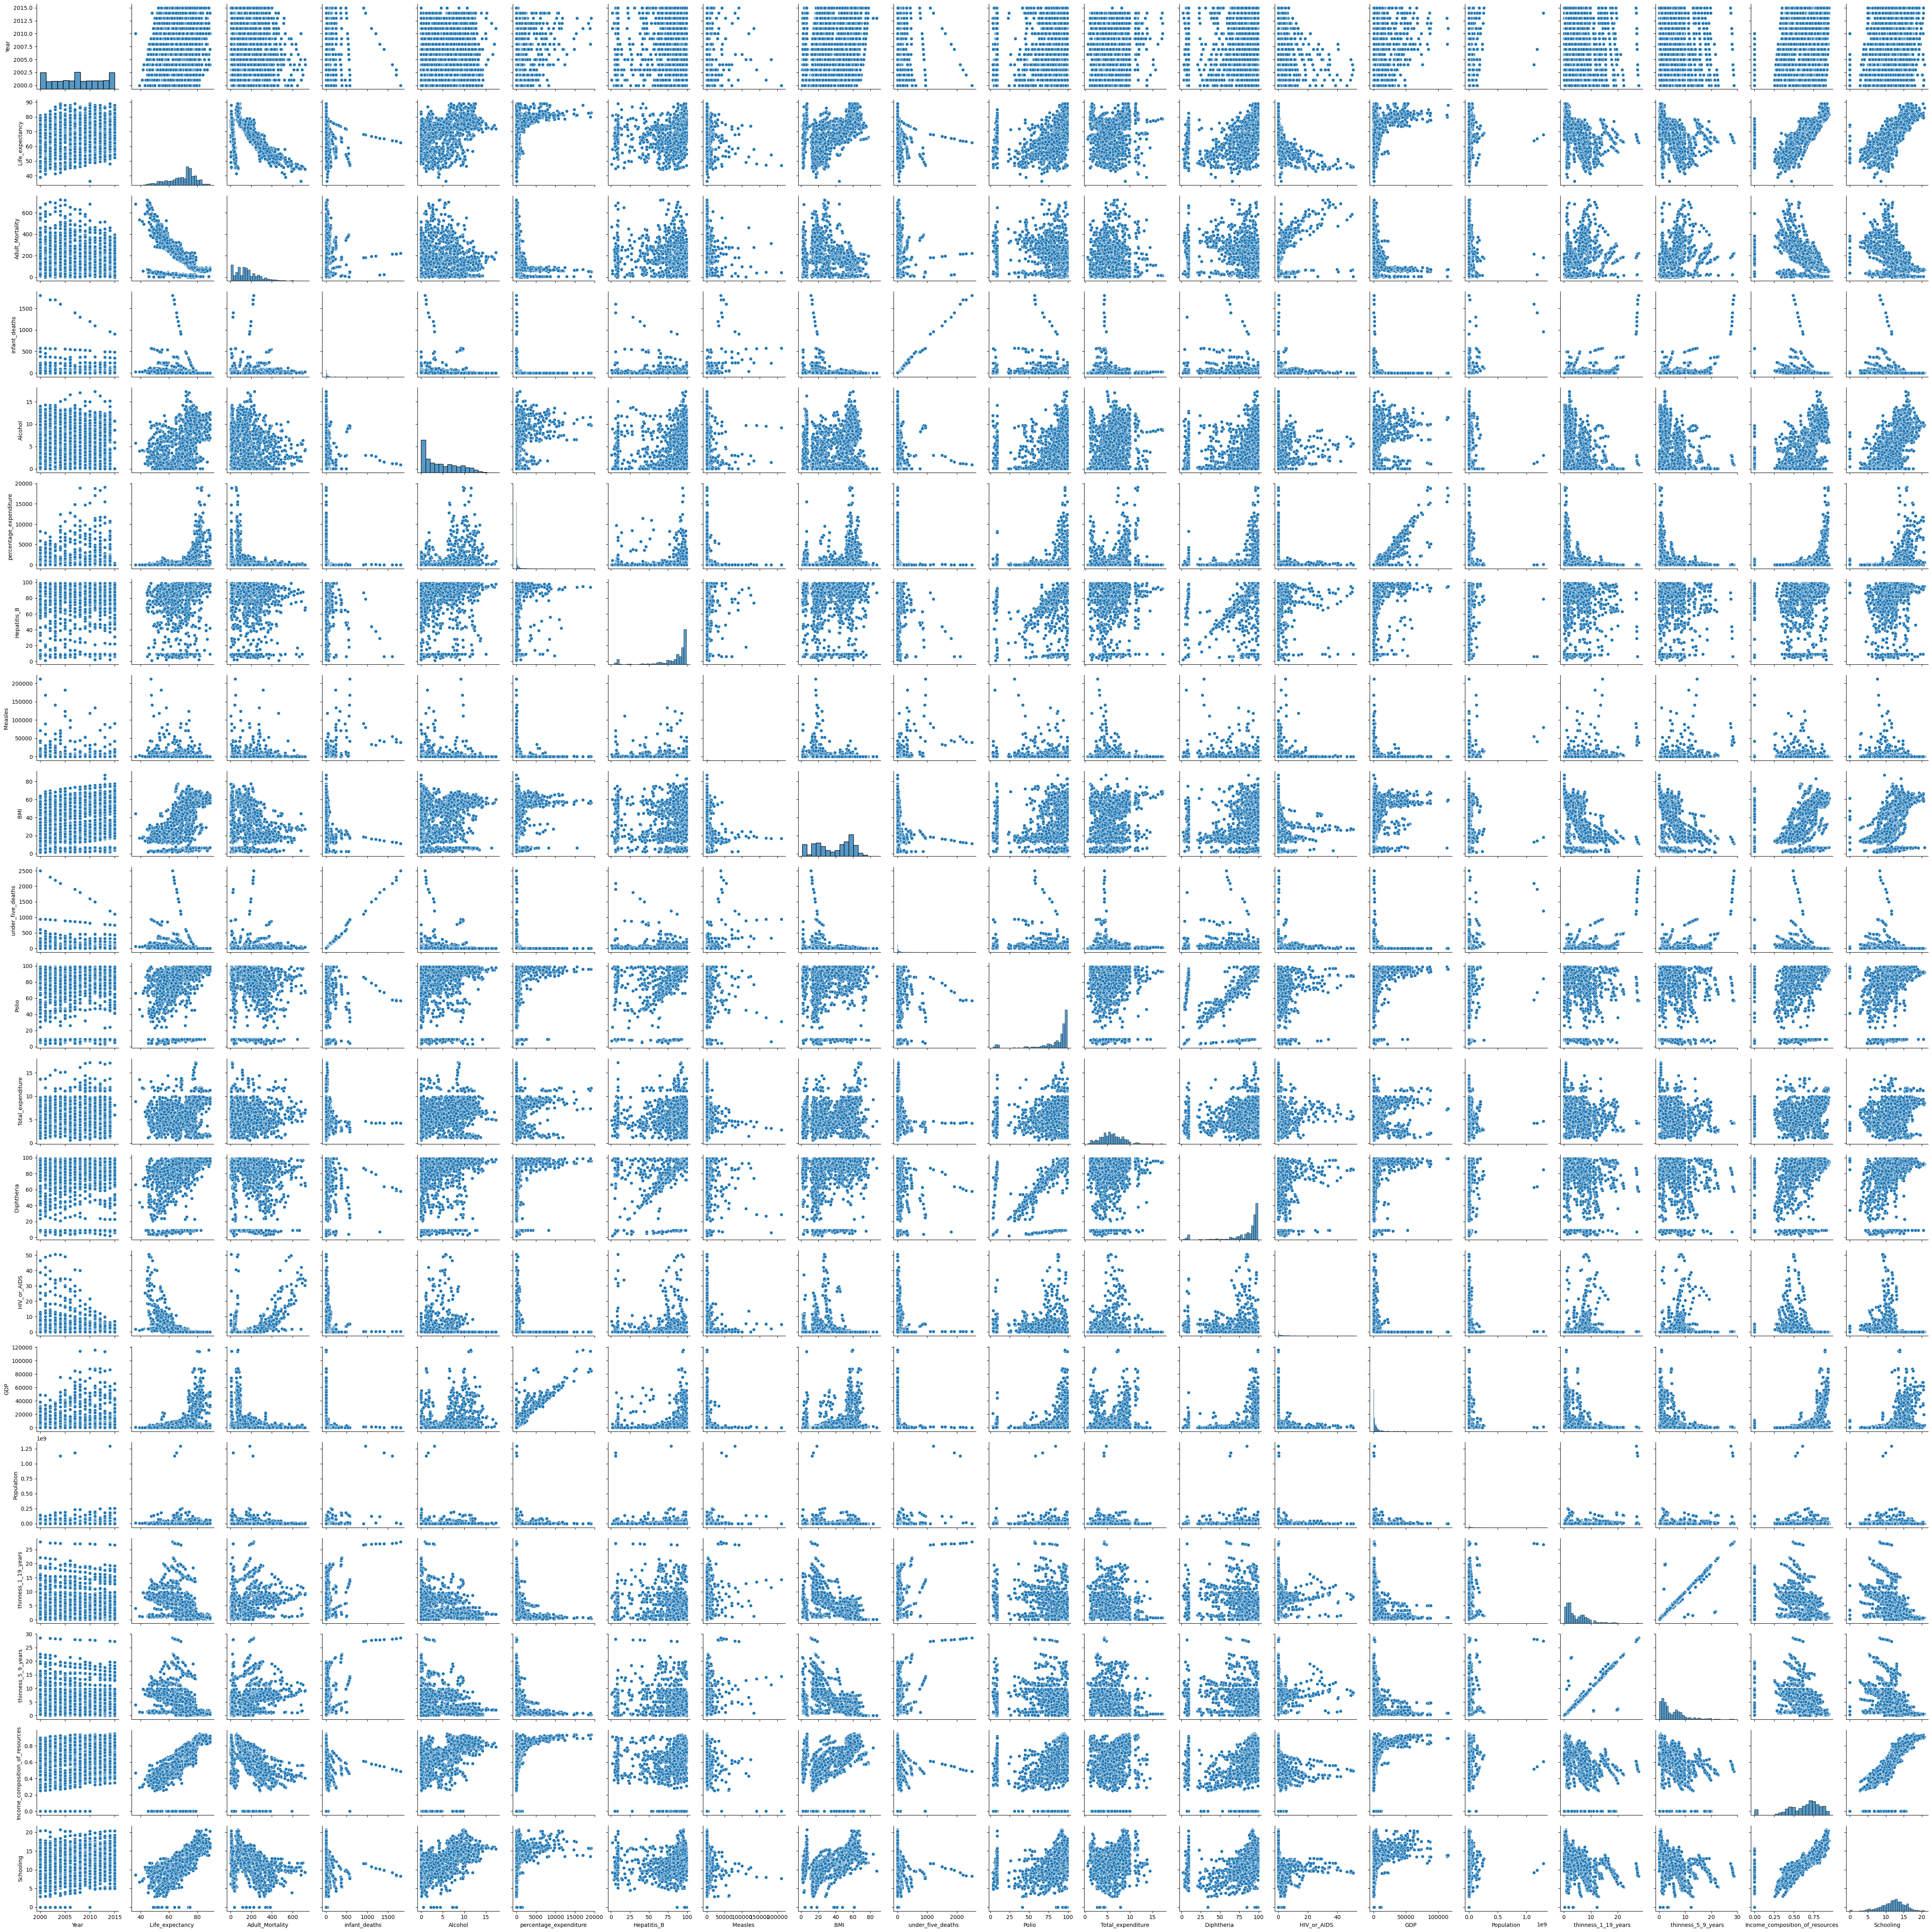

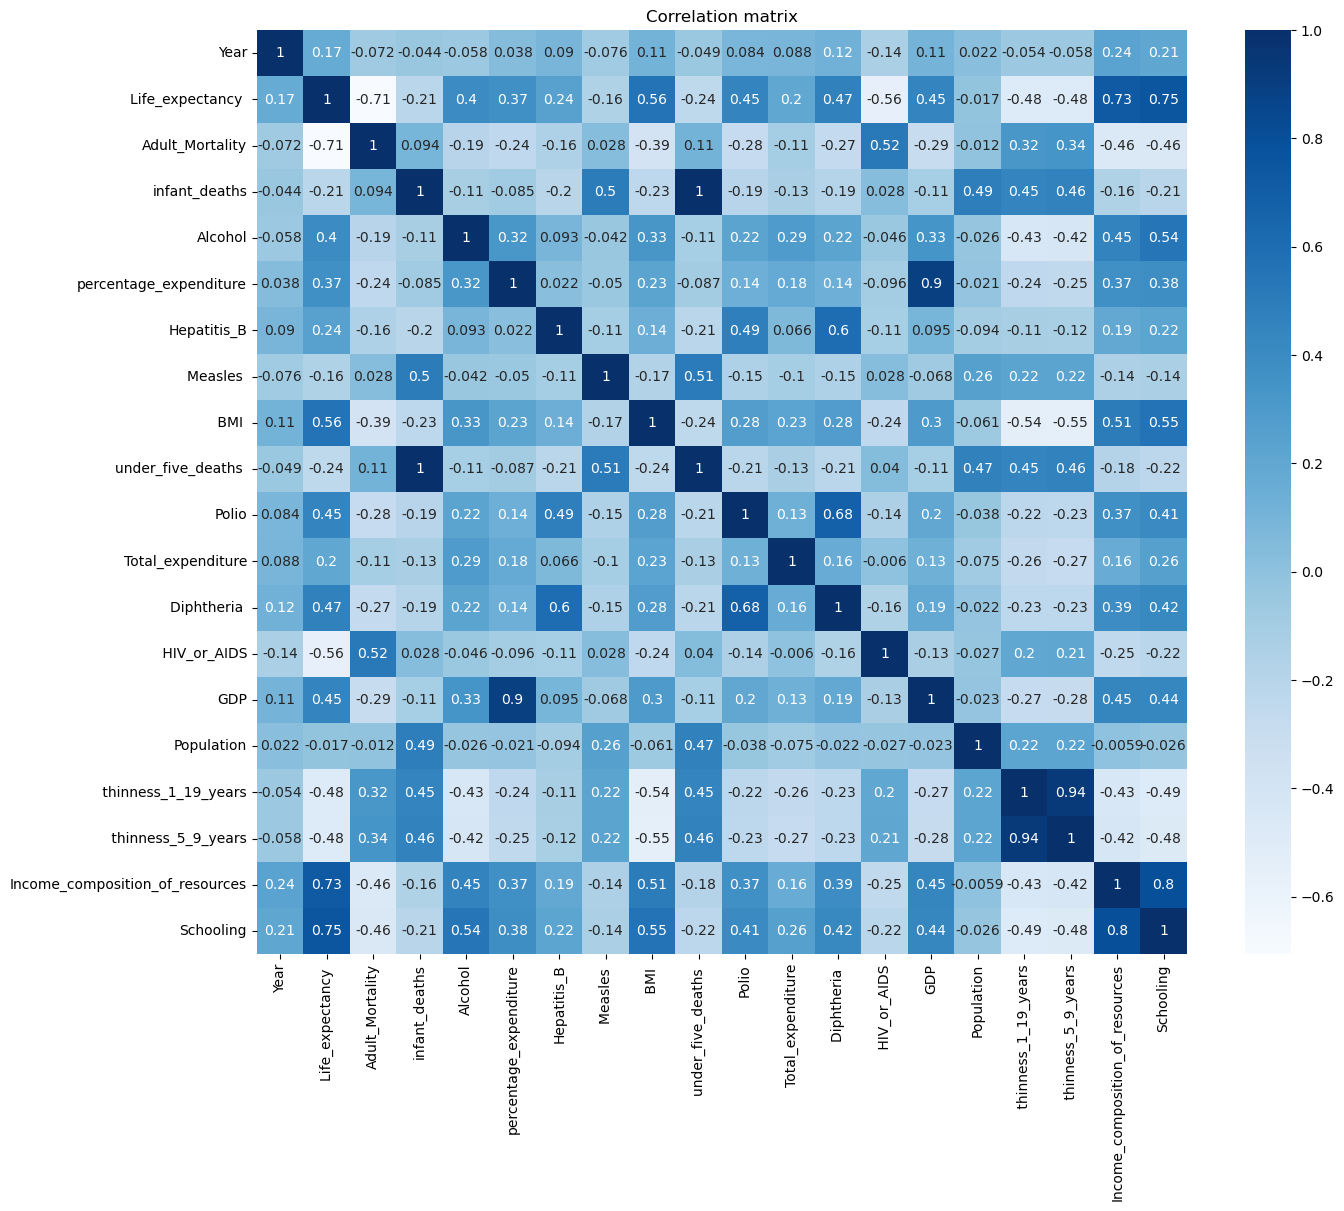

In [298]:
plt.figure(figsize = (15,12))
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.title("Correlation matrix")
plt.show()

feature-feature yang berkolerasi lebih dari 0.5

- Adult_morality, HIV_or_AIDS
- Infant_deaths, under_five_deaths
- infant_deaths, measles
- Alcohol, Schooling
- precentage_expenditure, GDP
- hepatitis_B, Diphteria
- measles, under_five_deaths
- BMI, Schooling
- BMI, income_composition_of_resources,
- polio, Diphteria
- thinnes_5_9_years, thinnes_1_19_years
- income_composition_of_resources, Schooling

Feature yang paling berkolerasi dengan Life_expectancy:
- income_composotion_of_resources
- Schooling
- Adult_Mortality
- BMI

Feature yang mempunyai linier korelasi dengan target:
- income_composotion_of_resources
- Schooling

## Feature Engineering

In [303]:
''' untuk missing value, saya akan menghapus baris yang mengandung missing value
alsannya, jika menghapus kolom yang setidaknya mengandung 1 missing value, akan ada banyak feature yang hilang,
dimana salah satu feature tersebut memiliki korelasi yang kuat terhadap target
'''

# delete row contains missing value and delete object column
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 2737 to 860
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2203 non-null   object 
 1   Year                             2203 non-null   int64  
 2   Status                           2203 non-null   object 
 3   Life_expectancy                  2196 non-null   float64
 4   Adult_Mortality                  2196 non-null   float64
 5   infant_deaths                    2203 non-null   int64  
 6   Alcohol                          2057 non-null   float64
 7   percentage_expenditure           2203 non-null   float64
 8   Hepatitis_B                      1799 non-null   float64
 9   Measles                          2203 non-null   int64  
 10   BMI                             2177 non-null   float64
 11  under_five_deaths                2203 non-null   int64  
 12  Polio             

In [302]:
test = test.dropna().drop(['Country','Status'], axis = 1)
test

Year  Life_expectancy   Adult_Mortality  infant_deaths  Alcohol  \
2546  2006              73.7            123.0              8     0.97   
1740  2007              74.2            125.0              0     4.98   
535   2008              49.6            394.0             46     0.45   
2371  2005              67.4             24.0              0     0.90   
2014  2008              73.9            138.0             11     4.85   
...    ...               ...              ...            ...      ...   
561   2014              75.8             86.0            171     5.78   
229   2010              73.0            222.0              0    14.44   
2284  2012              72.7            174.0              0     0.01   
862   2003              58.8            343.0              7     0.56   
1762  2001              69.0            155.0             26     0.46   

      percentage_expenditure  Hepatitis_B  Measles    BMI   \
2546              122.652333         83.0       517   48.5   
1740              678.518894          9.0         0   57.2   
535                49.091982         17.0        63   16.4   
2371               25.311560         83.0         0   42.1   
2014               58.498974         93.0         1    5.8   
...                      ...          ...       ...    ...   
561               109.874390         99.0     52628   31.9   
229                 8.494095         96.0         1   59.3   
2284              177.263396         99.0         0   34.8   
862                 6.913998         91.0       376   13.3   
1762               71.116450         84.0      2724   45.7   

      under_five_deaths   Polio  Total_expenditure  Diphtheria    HIV_or_AIDS  \
2546                  10   83.0               3.78          8.0           0.1   
1740                   0   92.0               6.74         92.0           0.1   
535                   80    3.0               2.92         19.0           4.7   
2371                   0    9.0               7.83         89.0           0.1   
2014                  14   93.0               4.73         93.0           0.3   
...                  ...    ...                ...          ...           ...   
561                  198   99.0               5.55         99.0           0.1   
229                    1   99.0               5.55         98.0           0.1   
2284                   0   98.0               4.80         98.0           0.1   
862                   10   95.0               3.50         93.0           1.9   
1762                  30   93.0               4.44         96.0           0.1   

               GDP  Population   thinness_1_19_years   thinness_5_9_years  \
2546   1762.246170  18914977.0                   6.4                  6.3   
1740   5957.145693    615875.0                   2.1                  2.2   
535     929.772391  11133861.0                   9.8                  9.7   
2371     88.874858    469885.0                   1.3                  1.3   
2014    428.878110   2864198.0                   1.2                  1.2   
...            ...         ...                   ...                  ...   
561    7683.523800    136427.0                   3.7                  3.0   
229      63.388770    949583.0                   2.0                  2.2   
2284  12845.173630      8833.0                   5.7                  6.1   
862     232.794546   3738265.0                   9.7                  9.7   
1762   1336.775376  29181832.0                   6.7                  6.5   

      Income_composition_of_resources  Schooling  
2546                            0.636       11.4  
1740                            0.762       13.6  
535                             0.338        6.0  
2371                            0.465        8.3  
2014                            0.700       13.2  
...                               ...        ...  
561                             0.723       13.1  
229                             0.780       15.5  
2284                       

In [275]:
# feature Scaling for train data
X = train[features]
y = train[target]

sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std = pd.DataFrame(X_std)
X_std.columns = list(X.columns)
X_std.describe()

Year  Adult_Mortality  infant_deaths       Alcohol  \
count  1.252000e+03     1.252000e+03   1.252000e+03  1.252000e+03   
mean  -2.386580e-14    -1.498624e-16  -1.627204e-17  3.369686e-18   
std    1.000400e+00     1.000400e+00   1.000400e+00  1.000400e+00   
min   -1.923038e+00    -1.330443e+00  -2.698212e-01 -1.129597e+00   
25%   -6.962759e-01    -7.299893e-01  -2.603937e-01 -9.439055e-01   
50%    3.978160e-02    -1.690387e-01  -2.415387e-01 -1.717546e-01   
75%    7.758391e-01     4.630184e-01  -7.184339e-02  7.023076e-01   
max    1.757249e+00     4.373871e+00   1.481420e+01  3.196949e+00   

       percentage_expenditure   Hepatitis_B      Measles           BMI   \
count            1.252000e+03  1.252000e+03  1.252000e+03  1.252000e+03   
mean             9.310976e-18 -2.441249e-16  4.974721e-17 -9.417387e-17   
std              1.000400e+00  1.000400e+00  1.000400e+00  1.000400e+00   
min             -3.898222e-01 -3.101253e+00 -2.094931e-01 -1.841690e+00   
25%             -3.679881e-01 -1.822688e-01 -2.094931e-01 -9.465512e-01   
50%             -3.050419e-01  3.775363e-01 -2.080930e-01  2.924820e-01   
75%             -9.163633e-02  6.574389e-01 -1.694019e-01  8.791262e-01   
max              1.079353e+01  7.773972e-01  1.316885e+01  1.956327e+00   

       under_five_deaths          Polio  Total_expenditure   Diphtheria   \
count        1.252000e+03  1.252000e+03       1.252000e+03  1.252000e+03   
mean         4.351773e-17  2.853592e-16       1.867516e-16 -2.825216e-16   
std          1.000400e+00  1.000400e+00       1.000400e+00  1.000400e+00   
min         -2.705506e-01 -3.456153e+00      -2.279062e+00 -3.675169e+00   
25%         -2.636584e-01 -1.814513e-01      -6.601558e-01 -8.773928e-02   
50%         -2.429819e-01  3.861637e-01      -5.361130e-02  3.733411e-01   
75%         -8.963121e-02  6.044772e-01       6.456603e-01  5.982583e-01   
max          1.420300e+01  6.918026e-01       3.677292e+00  6.882252e-01   

        HIV_or_AIDS           GDP    Population   thinness_1_19_years  \
count  1.252000e+03  1.252000e+03  1.252000e+03          1.252000e+03   
mean   1.851665e-16 -2.385383e-17 -2.505096e-18         -2.128223e-18   
std    1.000400e+00  1.000400e+00  1.000400e+00          1.000400e+00   
min   -3.153282e-01 -4.830869e-01 -2.102296e-01         -1.050874e+00   
25%   -3.153282e-01 -4.406680e-01 -2.071702e-01         -6.949443e-01   
50%   -3.153282e-01 -3.370501e-01 -1.876134e-01         -4.057514e-01   
75%   -2.189672e-01 -4.791859e-02 -9.050134e-02          4.840730e-01   
max    7.795054e+00  1.019988e+01  1.992013e+01          4.977686e+00   

        thinness_5_9_years  Income_composition_of_resources     Schooling  
count         1.252000e+03                     1.252000e+03  1.252000e+03  
mean          6.774843e-17                     2.546774e-16 -2.944042e-16  
std           1.000400e+00                     1.000400e+00  1.000400e+00  
min          -1.058079e+00                    -3.462708e+00 -2.815328e+00  
25%          -7.050156e-01                    -6.517613e-01 -6.314879e-01  
50%          -3.960855e-01                     2.377095e-01  6.006141e-02  
75%           4.865720e-01                     6.598312e-01  6.424187e-01  
max           5.142590e+00                     1.668538e+00  3.117437e+00

In [289]:
# feature Scaling for test data
X = test[features]
y = test[target]

sc = StandardScaler()
X_std_test = sc.fit_transform(X)
X_std_test = pd.DataFrame(X_std)
X_std_test.columns = list(X.columns)
X_std_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1252 non-null   float64
 1   Adult_Mortality                  1252 non-null   float64
 2   infant_deaths                    1252 non-null   float64
 3   Alcohol                          1252 non-null   float64
 4   percentage_expenditure           1252 non-null   float64
 5   Hepatitis_B                      1252 non-null   float64
 6   Measles                          1252 non-null   float64
 7    BMI                             1252 non-null   float64
 8   under_five_deaths                1252 non-null   float64
 9   Polio                            1252 non-null   float64
 10  Total_expenditure                1252 non-null   float64
 11  Diphtheria                       1252 non-null   float64
 12   HIV_or_AIDS        

## Modeling

In [276]:
# Vanilla Model

# train model
lr = LinearRegression().fit(X_std,y)

## Model's error
y_pred = lr.predict(X_std)
residuals = y - y_pred
MSE = np.mean(residuals**2)
RMSE = np.sqrt(MSE)
MAE = np.mean(abs(residuals))
print('RMSE:',RMSE)
print('MAE:',MAE)


RMSE: 3.6241832220301577
MAE: 2.7609335467226432


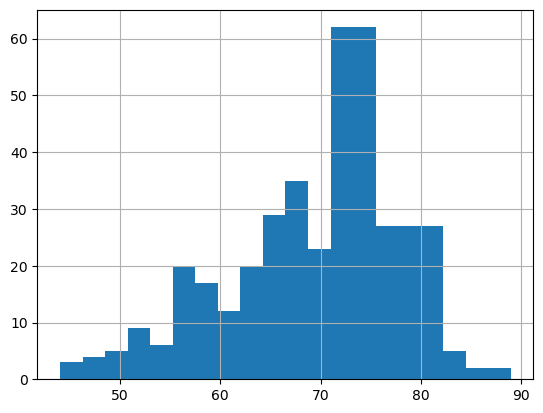

In [269]:
y.hist(bins=20)
plt.show()

In [305]:
## Model's error on testing data

X_test = StandardScaler().fit_transform(test[features])
y_test = test[target]

y_test_pred = lr.predict(X_test)
residuals_test = y_test - y_test_pred
MSE = np.mean(residuals_test**2)
RMSE = np.sqrt(MSE)
MAE = np.mean(abs(residuals_test))
# print('MSE:',MSE)
print('RMSE:',RMSE)
print('MAE:',MAE)

RMSE: 3.32053266098851
MAE: 2.5521932914644565


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


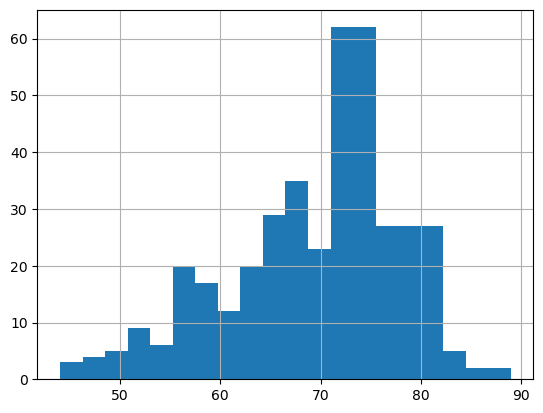

In [144]:
y_test.hist(bins=20)
plt.show()

selisih eror antara trian data dan test data kecil, hanya berbeda 0,3.
eror tersebut masih bisa diterima, karena distribusi data life_expectation ada di antara 72 tahun sampai 74 tahun

## interpretasi model 

In [145]:
import statsmodels.formula.api as smf

In [201]:
train.columns

Index(['Year', 'Life_expectancy ', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles ', ' BMI ',
       'under_five_deaths ', 'Polio', 'Total_expenditure', 'Diphtheria ',
       ' HIV_or_AIDS', 'GDP', 'Population', ' thinness_1_19_years',
       ' thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [222]:
Life_expectancy = train['Life_expectancy ']
Measles = train['Measles ']
BMI = train[' BMI ']
under_five_deaths = train['under_five_deaths ']
Polio = train['Polio']
Total_expenditure = train['Total_expenditure']
Diphtheria = train['Diphtheria ']
HIV_or_AIDS = train[' HIV_or_AIDS']
GDP = train['GDP']
Population = train['Population']
thinness_1_19_years = train[' thinness_1_19_years']
thinness_5_9_years = train[' thinness_5_9_years']
Income_composition_of_resources = train['Income_composition_of_resources']
Schooling = train['Schooling']

In [241]:
# fitting the model
# df.columns = ['Head_size', 'Brain_weight']
model = smf.ols(formula='Life_expectancy ~ Adult_Mortality + infant_deaths +Alcohol + percentage_expenditure + Hepatitis_B + Measles + BMI + under_five_deaths + Polio + Total_expenditure + Diphtheria + HIV_or_AIDS + GDP + Population + thinness_1_19_years + thinness_5_9_years + Income_composition_of_resources + Schooling', data=train).fit()
 
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     332.3
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:36:53   Log-Likelihood:                -3401.3
No. Observations:                1252   AIC:                             6841.
Df Residuals:                    1233   BIC:                             6938.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

R- Squared yang didapat 0,829

In [243]:
def calc_error(model):
  residuals = model.resid
  MSE = np.mean(residuals**2)
  RMSE = np.sqrt(MSE)
  MAE = np.mean(abs(residuals))
  print('MSE:',MSE)
  print('RMSE:',RMSE)
  print('MAE:',MAE)

calc_error(model)

MSE: 13.402936111667128
RMSE: 3.661002063870919
MAE: 2.7868362649671736


- dari model yang dibuat dari ols, dapat dilihat nilai RMSE nya sebesar 3.66 dimana hanya selisih 0.04 dari vanila model (normal equation). 
- nilai R squarednya 0.829 ( mendekati angka 1 ) yang berarti model hampir mereprentasikan dari pola data yang ada 
- nilai range interceptnya juga kecil, menunjukan bahwa mode ini cukup yakin dengan koefisien yang diberiikan
keismpulan : model sudah baik, namun perlu dipilah lagi, feature-feature yang saling berkorelasi. serta menghapus feature yang multicollinier


## Regularization

In [255]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

X = StandardScaler().fit_transform(train[features])
y = train[target]

X_test = StandardScaler().fit_transform(test[features])
y_test = test[target]

for myalpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 1.5, 2]:
# for myalpha in [0.01, 0.05, 0.1]:
  ridge_reg = Ridge(alpha=myalpha)
  ridge_reg.fit(X,y)

  ## Model's training error
  y_pred = ridge_reg.predict(X)
  residuals = y - y_pred
  MSE = np.mean(residuals**2)
  RMSE = np.sqrt(MSE)
  MAE = np.mean(abs(residuals))

  ## Model's test set error
  y_test_pred = ridge_reg.predict(X_test)
  residuals = y_test - y_test_pred
  MSE = np.mean(residuals**2)
  RMSE_test = np.sqrt(MSE)

  # print('MSE:',MSE)
  print('alpha:', myalpha,', RMSE train:', RMSE, ', RMSE test:', RMSE_test)
  # print('MAE:',MAE)  


alpha: 0.1 , RMSE train: 3.624247452248395 , RMSE test: 3.320977896819301
alpha: 0.2 , RMSE train: 3.6244259866007913 , RMSE test: 3.3214859160707912
alpha: 0.3 , RMSE train: 3.6247001458525068 , RMSE test: 3.32204439254878
alpha: 0.4 , RMSE train: 3.6250541858428638 , RMSE test: 3.3226430466681536
alpha: 0.5 , RMSE train: 3.6254748006910336 , RMSE test: 3.323273289277212
alpha: 0.6 , RMSE train: 3.625950717929922 , RMSE test: 3.3239279325647324
alpha: 0.7 , RMSE train: 3.626472367030393 , RMSE test: 3.3246009543462742
alpha: 1 , RMSE train: 3.628236128651191 , RMSE test: 3.3266837335225055
alpha: 1.5 , RMSE train: 3.63152678972127 , RMSE test: 3.3301829805635847
alpha: 2 , RMSE train: 3.634920948060345 , RMSE test: 3.3335331134696977


Regularization yang saya gunakan adalah Ridge, dengan alpa sebesar 0.1

In [311]:
model_summary=pd.DataFrame({'feature_name':(['intercept'] + list(lr.feature_names_in_)), 'coefficient_normal':([lr.intercept_]+list(lr.coef_)), 'coefficient_ridge':([ridge_reg.intercept_]+list(ridge_reg.coef_)),})

model_summary

feature_name  coefficient_normal  coefficient_ridge
0                         intercept           69.253834          69.253834
1                              Year           -0.558482          -0.587373
2                   Adult_Mortality           -2.129511          -2.162959
3                     infant_deaths           10.263865           6.408136
4                           Alcohol           -0.404957          -0.483238
5            percentage_expenditure            0.625981           0.570976
6                       Hepatitis_B           -0.093354          -0.087498
7                          Measles            -0.181148          -0.105201
8                              BMI             0.537298           0.543172
9                under_five_deaths           -10.247340          -6.513262
10                            Polio            0.011693           0.021215
11                Total_expenditure            0.138649           0.136592
12                      Diphtheria             0.337340           0.368400
13                      HIV_or_AIDS           -2.770953          -2.774442
14                              GDP            0.184515           0.240571
15                       Population           -0.210837          -0.072435
16              thinness_1_19_years           -0.033837          -0.035030
17               thinness_5_9_years           -0.326046          -0.299963
18  Income_composition_of_resources            1.929129           1.973908
19                        Schooling            2.613397           2.628296

In [ ]:
# ridge_reg.predict(new_data) << predict new data 